### Import the excel sheets

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the excel workbook then store the 2 worksheets in seperate dataframes (df1,df2)

xls = pd.ExcelFile('D:\Important\Data Analyst Assignment (1).xlsx')
df1 = pd.read_excel(xls, 'Assignment-1')
df2 = pd.read_excel(xls, 'Assignment-2')

In [3]:
#df1 contains the excel sheet for the first assignment 
df1.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [4]:
#df2 contains the excel sheet for the second assignment 
df2=df2.rename(columns={i:i.strftime('%#m/%#d/%Y') for i in df2.columns[1:]})
df2.head()

,SKU,8/1/2019,8/2/2019,8/3/2019,8/4/2019,8/5/2019,8/6/2019,8/7/2019,8/8/2019,8/9/2019,...,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020
0,2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,...,1929,1948,1929,1987,2027,1926,1926,1849,1904,1828
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,7096,7025,6955,6746,6881,6606,6804,6872,6872,7078
2,3086,891,909,936,889,880,906,870,879,844,...,829,829,812,788,788,772,811,803,763,763
3,3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,...,1719,1805,1895,1895,1990,2030,2050,2132,2111,2027
4,3166,369,354,343,340,330,337,350,343,340,...,335,328,325,319,316,319,329,336,349,352


In [5]:
#Display shape of first data file
df1.shape

(16834, 16)

In [6]:
#Display shape of second data file
df2.shape

(247, 367)

In [7]:
#Confirm whether all SKUs have a unique id
x1 = df2.SKU.unique()
print(x1.shape) 

(247,)


In [8]:
#Check whether the first data file has any null/missing values
df1.isnull().values.any()

True

In [9]:
#Seeing which column has how many missing values
null_cols1 = df1.columns[df1.isnull().any()]
df1[null_cols1].isnull().sum()

link_clicks    546
dtype: int64

In [10]:
#Check whether the second data file has any null/missing values
df2.isnull().values.any()

False

## Assignment 1 Code

In [11]:
#Since link_clicks column has a few missing values, we first find out the count for each unique value
df1['link_clicks'].value_counts()

0.0      15101
1.0        233
2.0        104
3.0         87
4.0         64
         ...  
221.0        1
244.0        1
116.0        1
88.0         1
327.0        1
Name: link_clicks, Length: 160, dtype: int64

In [13]:
#Get a description of the column with missing values
df1['link_clicks'].describe()

count    16288.000000
mean         2.170371
std         18.659132
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        450.000000
Name: link_clicks, dtype: float64

In [14]:
#Since there are outliers, we will use the median to fill out the missing values. The median is 0
x = int(df1['link_clicks'].median())
x

0

In [15]:
#Fill empty values with 0
df1.fillna(0, inplace=True)

In [16]:
#Check if there are any remaining missing values
df1.isnull().values.any()

False

In [17]:
#Convert link_clicks column to int from float 
df1["link_clicks"] = df1["link_clicks"].astype(int)

In [18]:
#Find correlation between features that have integer values
df1.corr()

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744552,0.838371,0.697143
impressions,0.744552,1.000000,0.917512,0.963112
clicks,0.838371,0.917512,1.000000,0.925325
link_clicks,0.697143,0.963112,0.925325,1.000000


Here the EDA part ends

Now let us build a Machine Learning Model to classify the spending pattern of users based on their actions 

In [19]:
#Drop Date column
df1.drop(columns=["Date"],inplace=True)
df1

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16829,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0
16830,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0
16831,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0
16832,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0.00,3,0,0


Find the unique values in the features that have non-integer/string values and replace the values with integers which helps in classification

In [20]:
#View the different values for each of these columns along with how many times it has been recorded
df1["product"].value_counts()

Product 1    16834
Name: product, dtype: int64

In [21]:
#Map each unique value to an integer and replace the string with the mapped integer 
df1["product"] = df1["product"].map({'Product 1':'0'})

In [22]:
df1["phase"].value_counts()

Performance    16834
Name: phase, dtype: int64

In [23]:
df1["phase"] = df1["phase"].map({'Performance':'0'})

In [24]:
df1["campaign_platform"].value_counts()

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

In [25]:
df1["campaign_platform"] = df1["campaign_platform"].map({'Google Ads':'0', 'Facebook Ads':'1'})

In [26]:
df1["campaign_type"].value_counts()

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64

In [27]:
df1["campaign_type"] = df1["campaign_type"].map({'Search':'0', 'Conversions':'1'})

In [28]:
df1["communication_medium"].value_counts()

Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64

In [29]:
df1["communication_medium"] = df1["communication_medium"].map({'Search Keywords':'0', 'Creative':'1'})

In [30]:
df1["subchannel"].value_counts()

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64

In [31]:
df1["subchannel"] = df1["subchannel"].map({'Brand':'0', 'Generic':'1', 'Competitor':'2', 'Facebook Ads':'3'})

In [32]:
df1["audience_type"].value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [33]:
df1["audience_type"] = df1["audience_type"].map({"'-":'0', 'Audience 1':'1', 'Audience 2':'2', 'Audience 3':'3'})

In [34]:
df1["creative_type"].value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [35]:
df1["creative_type"] = df1["creative_type"].map({"'-":'0', 'Image':'1', 'Carousal':'2'})

In [36]:
df1["creative_name"].value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [37]:
df1["creative_name"] = df1["creative_name"].map({"'-":'0', 'Click':'1', 'Carousal':'2', 'Girl':'3'})

In [38]:
df1["device"].value_counts()

Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: device, dtype: int64

In [39]:
df1["device"] = df1["device"].map({'Mobile':'0', 'Desktop':'1', 'device':'2', 'Tablet':'3'})

In [40]:
df1["age"].value_counts()

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64

In [41]:
df1["age"] = df1["age"].map({'18-24':'0', '25-34':'1', '35-44':'2', 'Undetermined':'3', '45-54':'4', '55-64':'5', '65 or more':'6'})

In [42]:
#View dataframe to see if columns values have changed
df1.tail()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
16829,0,0,0,0,0,0,0,0,0,0,1,19.88,36,15,0
16830,0,0,0,0,0,0,0,0,0,0,2,1.64,11,1,0
16831,0,0,0,0,0,0,0,0,0,0,4,0.00,3,0,0
16832,0,0,0,0,0,0,0,0,0,0,6,0.00,3,0,0
16833,0,0,0,0,0,0,0,0,0,0,3,1.40,14,1,0


In [43]:
#Find out the threshold of our target variable (in this case, spends column)
print(df1["spends"].median())

22.535


In [44]:
print(df1["spends"].value_counts())

0.00      4104
0.43        52
0.46        42
1.42        33
1.43        32
          ... 
37.64        1
79.80        1
151.67       1
21.33        1
20.69        1
Name: spends, Length: 9087, dtype: int64


In [45]:
#Set all values below the threshold as 0 and all values above median as 1

for i in range(len(df1["spends"])):
    if df1["spends"][i] > 22.535:
        df1["spends"][i] = 1
    else:
        df1["spends"][i] = 0
df1["spends"].value_counts()

1.0    8417
0.0    8417
Name: spends, dtype: int64

In [46]:
#Convert to int
df1["spends"] = df1["spends"].astype(int)

In [47]:
df1.head(7)

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,5,0,0
2,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,3,0,5,3,0
4,0,0,0,0,0,0,0,0,0,1,0,1,10,2,0
5,0,0,0,0,0,0,0,0,0,1,1,1,61,10,0
6,0,0,0,0,0,0,0,0,0,1,2,1,36,10,0


In [48]:
#Separate the columns we use to gain insights into the features list and our target variable into the classes list

features = df1[["product", "phase", "campaign_platform", "campaign_type", "communication_medium", "subchannel", "audience_type", "creative_type", "creative_name", "device", "age", "impressions", "clicks", "link_clicks"]].values
classes = df1[["spends"]].values

In [49]:
#Split the dataset into training set (80%) and test set (20%)

from sklearn.model_selection import train_test_split, cross_val_score 
X_train, X_test, Y_train, Y_test = train_test_split(features, classes, train_size=0.80, random_state=15)

In [50]:
#Use Multinomial Naive Bayes algorithm to classify the test set and predict whether the user spends more than the threshold value or not

from sklearn.naive_bayes import MultinomialNB 

clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
from sklearn.metrics import confusion_matrix

#Store the predicted output of the testing feature set in variable 'y_pred'
Y_pred = clf.predict(X_test)

#Make and store confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

#Storing the values of true positive(tp),true negative(tn),false positive(fp) and false negative(fn)
tn,fp,fn,tp = [(cm[i,j]) for i in range(len(cm)) for j in range(len(cm))]
p = cm[1,0]+cm[1,1]
n = cm[0,0]+cm[0,1]

#Calculating the parameters to evaluate the insights 

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(fp + tp)
recall = tp/(fn + tp)
f1_measure = 2*(precision*recall)/(precision+recall)

In [52]:
#Print the parameters calculated to show how accurate our model was in predicting spending patterns

print("Accuracy = ", round(accuracy*100, ))
print("Precision = ", round(precision*100, 2))
print("Recall = ", round(recall*100, 2))
print("F1 Measure = ", round(f1_measure*100, 2))

Accuracy =  78.0
Precision =  90.21
Recall =  62.54
F1 Measure =  73.87


array([[1574,  114],
       [ 629, 1050]], dtype=int64)

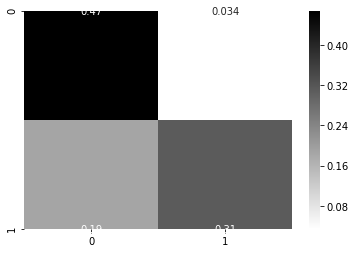

In [65]:
import seaborn as sns

sns.heatmap(cm/np.sum(cm),annot=True,cmap="binary")
cm

In the above code, the data is carefully explored and pre-processed following which a Machine Learning model is built which uses Naive Bayes Algorithm to try and predict people's spending patterns based on their data from the marketing campaign. The model tries to predict whether the user spends more than 22.5rs (median value of the dataset). After running the code, the model returns an accuracy of 77%, which tells us it can accurately predict the spending pattern of a person, based on their campaign history 77 times out of a 100.

## Assignment 2 Code

1) What is the monthly & quaterly sales data by SKU

In [54]:
#Find monthly sales of each SKU

year=2019
month=8
flag=True
while flag:
    df2[str(month)+'/'+str(year)]=df2.loc[:, df2.columns.str.endswith(str(year)) & df2.columns.str.startswith(str(month))].sum(axis=1)
    if month==12:
        month=0
        year=2020
    month+=1
    if month==8 and year==2020:
        flag=False
df2

,SKU,8/1/2019,8/2/2019,8/3/2019,8/4/2019,8/5/2019,8/6/2019,8/7/2019,8/8/2019,8/9/2019,...,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020
0,2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,...,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062
2,3086,891,909,936,889,880,906,870,879,844,...,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153
3,3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,...,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253
4,3166,369,354,343,340,330,337,350,343,340,...,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,PPAM11156,2,2,2,2,2,2,2,2,2,...,62,60,62,62,58,62,60,62,60,62
243,PSTM01257,22,23,24,25,24,25,24,24,24,...,779,715,715,742,803,725,704,797,796,698
244,PSTM01457,14,13,12,11,10,10,10,10,10,...,357,308,319,311,295,320,349,390,342,444
245,WIM5011B,92,92,91,93,95,92,92,93,97,...,1954,2035,1855,1567,1430,1458,984,904,766,816


In [55]:
#Create new dataframe that has monthly sales of each SKU
df2_ = df2[['SKU','8/2019','9/2019','10/2019','11/2019','12/2019','1/2020','2/2020','3/2020','4/2020','5/2020','6/2020','7/2020']].copy()
df2_

,SKU,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,PPAM11156,62,60,62,60,62,62,58,62,60,62,60,62
243,PSTM01257,682,772,779,715,715,742,803,725,704,797,796,698
244,PSTM01457,323,305,357,308,319,311,295,320,349,390,342,444
245,WIM5011B,2886,2447,1954,2035,1855,1567,1430,1458,984,904,766,816


In [56]:
#Drop the montly sales columns from original dataframe
df2.drop(columns=['8/2019','9/2019','10/2019','11/2019','12/2019','1/2020','2/2020','3/2020','4/2020','5/2020','6/2020','7/2020'], inplace=True)
df2.head()

,SKU,8/1/2019,8/2/2019,8/3/2019,8/4/2019,8/5/2019,8/6/2019,8/7/2019,8/8/2019,8/9/2019,...,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020
0,2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,...,1929,1948,1929,1987,2027,1926,1926,1849,1904,1828
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,7096,7025,6955,6746,6881,6606,6804,6872,6872,7078
2,3086,891,909,936,889,880,906,870,879,844,...,829,829,812,788,788,772,811,803,763,763
3,3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,...,1719,1805,1895,1895,1990,2030,2050,2132,2111,2027
4,3166,369,354,343,340,330,337,350,343,340,...,335,328,325,319,316,319,329,336,349,352


Here we see the final product, a table containing monthly and quaterly sales data of all SKUs

In [57]:
#Create Quarterly sales columns in new dataframe

df2_["Quarter 1 (Aug-Oct)"] = df2_["8/2019"] + df2_["9/2019"] + df2_["10/2019"]
df2_["Quarter 2 (Nov-Jan)"] = df2_["11/2019"] + df2_["12/2019"] + df2_["1/2020"]
df2_["Quarter 3 (Feb-Apr)"] = df2_["2/2020"] + df2_["3/2020"] + df2_["4/2020"]
df2_["Quarter 4 (May-Jul)"] = df2_["5/2020"] + df2_["6/2020"] + df2_["7/2020"]
df2_

,SKU,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020,Quarter 1 (Aug-Oct),Quarter 2 (Nov-Jan),Quarter 3 (Feb-Apr),Quarter 4 (May-Jul)
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826,109164,67573,92328,149514
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062,202948,250691,291648,488886
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153,92221,98051,87918,72568
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253,133786,202842,201019,165251
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182,32992,40932,32214,29096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,PPAM11156,62,60,62,60,62,62,58,62,60,62,60,62,184,184,180,184
243,PSTM01257,682,772,779,715,715,742,803,725,704,797,796,698,2233,2172,2232,2291
244,PSTM01457,323,305,357,308,319,311,295,320,349,390,342,444,985,938,964,1176
245,WIM5011B,2886,2447,1954,2035,1855,1567,1430,1458,984,904,766,816,7287,5457,3872,2486


2) Which are the top 3 months in terms of overall sales

In [58]:
#Create new dataframe to store monthly sales values for all SKUs
df2__ = df2_
df2__

,SKU,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020,Quarter 1 (Aug-Oct),Quarter 2 (Nov-Jan),Quarter 3 (Feb-Apr),Quarter 4 (May-Jul)
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826,109164,67573,92328,149514
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062,202948,250691,291648,488886
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153,92221,98051,87918,72568
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253,133786,202842,201019,165251
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182,32992,40932,32214,29096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,PPAM11156,62,60,62,60,62,62,58,62,60,62,60,62,184,184,180,184
243,PSTM01257,682,772,779,715,715,742,803,725,704,797,796,698,2233,2172,2232,2291
244,PSTM01457,323,305,357,308,319,311,295,320,349,390,342,444,985,938,964,1176
245,WIM5011B,2886,2447,1954,2035,1855,1567,1430,1458,984,904,766,816,7287,5457,3872,2486


In [59]:
#Sum the sales of each SKU from monthly sales into new dataframe to find monthly sales of all SKUs

df2__["August 2019 Sales"] = df2__["8/2019"].sum()
df2__["September 2019 Sales"] = df2__["9/2019"].sum()
df2__["October 2019 Sales"] = df2__["10/2019"].sum()
df2__["November 2019 Sales"] = df2__["11/2019"].sum()
df2__["December 2019 Sales"] = df2__["12/2019"].sum()
df2__["January 2020 Sales"] = df2__["1/2020"].sum()
df2__["February 2020 Sales"] = df2__["2/2020"].sum()
df2__["March 2020 Sales"] = df2__["3/2020"].sum()
df2__["April 2020 Sales"] = df2__["4/2020"].sum()
df2__["May 2020 Sales"] = df2__["5/2020"].sum()
df2__["June 2020 Sales"] = df2__["6/2020"].sum()
df2__["July 2020 Sales"] = df2__["7/2020"].sum()
df2__

,SKU,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,...,October 2019 Sales,November 2019 Sales,December 2019 Sales,January 2020 Sales,February 2020 Sales,March 2020 Sales,April 2020 Sales,May 2020 Sales,June 2020 Sales,July 2020 Sales
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,PPAM11156,62,60,62,60,62,62,58,62,60,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
243,PSTM01257,682,772,779,715,715,742,803,725,704,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
244,PSTM01457,323,305,357,308,319,311,295,320,349,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
245,WIM5011B,2886,2447,1954,2035,1855,1567,1430,1458,984,...,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771


In [60]:
#Drop extra columns from new dataframe
df2__.drop(columns=['SKU', '8/2019', '9/2019', '10/2019', '11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', 'Quarter 1 (Aug-Oct)', 'Quarter 2 (Nov-Jan)', 'Quarter 3 (Feb-Apr)', 'Quarter 4 (May-Jul)'], inplace=True)
df2__

,August 2019 Sales,September 2019 Sales,October 2019 Sales,November 2019 Sales,December 2019 Sales,January 2020 Sales,February 2020 Sales,March 2020 Sales,April 2020 Sales,May 2020 Sales,June 2020 Sales,July 2020 Sales
0,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
1,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
2,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
3,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
4,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
...,...,...,...,...,...,...,...,...,...,...,...,...
242,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
243,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
244,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771
245,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771


Here we see the monthly sales data

In [61]:
#Display sales for each month one time by dropping duplicate records 
df2__= df2__.drop_duplicates()
df2__

,August 2019 Sales,September 2019 Sales,October 2019 Sales,November 2019 Sales,December 2019 Sales,January 2020 Sales,February 2020 Sales,March 2020 Sales,April 2020 Sales,May 2020 Sales,June 2020 Sales,July 2020 Sales
0,16590204,17309331,18300108,17954015,19536270,19170099,17973457,20234570,19103472,18555947,18303531,18795771


The top 3 months in terms of overall sales are:
March,
December,
January

3) Which SKUs are outliers in terms sales in any month

In [62]:
#Create a new dataframe
df2___ = df2

In [63]:
#Calculate the first quartile and third quartile then calculate the inter-quartile range

Q1 = df2___.quantile(0.25)
Q3 = df2___.quantile(0.75)
IQR = Q3-Q1

Display which SKUs are outliers 

In [64]:
#Display the outliers with the SKU id and date. Show the values lying outside the inter-quartile range

df2___ = df2___[((df2___ < (Q1 - 1.5 * IQR)) |(df2___ > (Q3 + 1.5 * IQR))).any(axis=1)]
df2___

,SKU,8/1/2019,8/2/2019,8/3/2019,8/4/2019,8/5/2019,8/6/2019,8/7/2019,8/8/2019,8/9/2019,...,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,7096,7025,6955,6746,6881,6606,6804,6872,6872,7078
14,14119,36207,34759,36149,35426,34009,34349,34692,33651,32978,...,26525,26525,25729,24957,26205,26467,27790,28346,29196,30656
15,14121,2882,2911,2969,2850,2765,2737,2710,2818,2931,...,8098,7936,7698,7467,7616,7388,7240,6950,6881,7156
17,14501,3970,3891,3735,3922,3883,3767,3842,3919,4115,...,7621,7545,7620,7849,8163,7755,7910,7831,7439,7439
18,14601,4932,5080,4877,5023,5174,5174,4967,4868,5014,...,5170,4963,5013,4762,4667,4574,4711,4617,4432,4476
21,21011,24620,24620,24866,23871,24110,23146,23840,22886,22199,...,23231,23463,24167,24409,23921,23203,22275,23166,23166,22239
23,21066,5218,5479,5424,5207,5207,5311,5417,5688,5574,...,3710,3562,3669,3559,3559,3417,3451,3451,3589,3625
28,21598,3925,4004,3884,3767,3729,3804,3994,4074,3993,...,5224,5433,5270,5059,5059,4907,5152,5049,5049,4999
34,30373,10354,10043,9943,9645,9163,9621,10102,10102,9799,...,8600,8428,8259,8094,8175,8012,8252,8500,8415,8078
36,30828,5548,5548,5548,5437,5709,5709,5652,5765,6053,...,4298,4169,4211,4253,4125,3919,3997,4037,4118,4200
